In [20]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
print(faces_all.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [21]:
K = 20
faces = faces_all.images[faces_all.target == K]

In [22]:
faces

array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]],

       [[0.23553719, 0.35123968, 0.4338843 , ..., 0.45867768,
         0.446281  , 0.47107437],
        [0.21900827, 0.36363637, 0.4338843 , ..., 0.46694216,
         0.44214877, 0.46694216],
        [0.2520661 , 0.35123968, 0.4338843 , ..., 0.47933885,
         0.45041323, 0.46280992],
        ...,
        [0.3966942 , 0.5041322 , 0.62396693, ..., 0.21900827,
         0.07024793, 0.07024793],
        [0.5

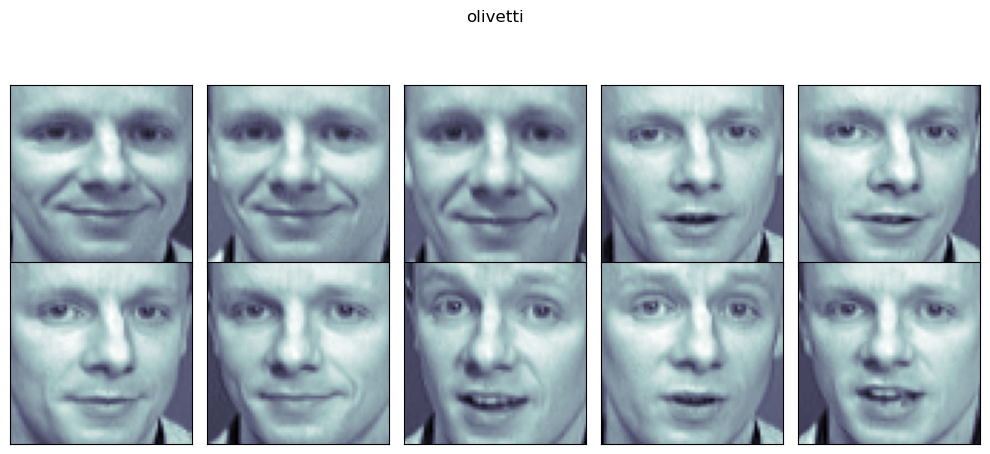

In [23]:
import matplotlib.pyplot as plt

N = 2
M = 5
# 2행 5열 생성

fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for n in range(N * M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle('olivetti')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = faces_all.data[faces_all.target == K]
W = pca.fit_transform(X)

X_inv = pca.inverse_transform(W)

### X는 64 x 64 픽셀 이미지가 10개인 데이터

In [25]:
X.shape

(10, 4096)

In [26]:
import numpy as np
np.sqrt(4096)

64.0

In [27]:
X[0].shape

(4096,)

### PCA로 4096인 픽셀을 2로 줄였다

In [28]:
W = pca.fit_transform(X)
W.shape

(10, 2)

In [29]:
W

array([[-2.213675 ,  4.213514 ],
       [ 2.26809  ,  3.7376182],
       [ 0.6599925,  3.1209493],
       [-1.7500482, -1.4096607],
       [-3.3963811, -1.5552857],
       [-3.335587 , -1.730935 ],
       [ 3.3851452, -2.1805708],
       [ 3.9338183, -1.5998876],
       [-3.2094378, -1.2286725],
       [ 3.6580782, -1.3670683]], dtype=float32)

In [30]:
X_inv = pca.inverse_transform(W)

In [31]:
X_inv

array([[0.4589705 , 0.51358795, 0.53748757, ..., 0.33472383, 0.41416898,
        0.523355  ],
       [0.27795875, 0.3479539 , 0.4025414 , ..., 0.13221842, 0.18065481,
        0.22391397],
       [0.34369713, 0.40215883, 0.44438425, ..., 0.24315707, 0.28969997,
        0.3393225 ],
       ...,
       [0.2158584 , 0.25214252, 0.30928165, ..., 0.30781975, 0.25940236,
        0.16483161],
       [0.5047522 , 0.5135678 , 0.52113056, ..., 0.64940953, 0.6440118 ,
        0.6460136 ],
       [0.22679098, 0.26368403, 0.3192843 , ..., 0.31038448, 0.26724035,
        0.18119547]], dtype=float32)

In [32]:
X_inv.shape

(10, 4096)

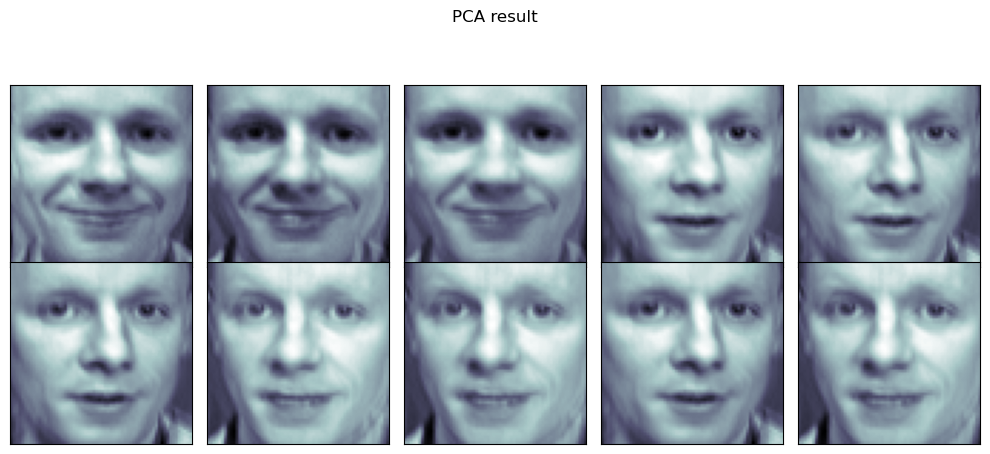

In [33]:
import matplotlib.pyplot as plt

N = 2
M = 5
# 2행 5열 생성

fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for n in range(N * M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(X_inv[n].reshape(64, 64), cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle('PCA result')
plt.tight_layout()
plt.show()

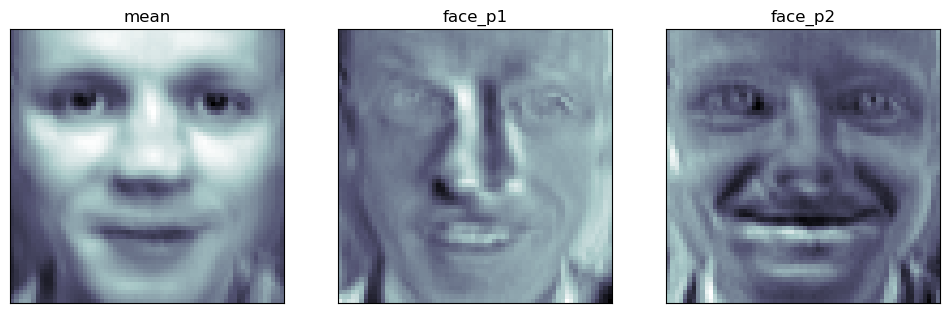

In [34]:
face_mean = pca.mean_.reshape(64, 64)
face_p1 = pca.components_[0].reshape(64, 64)
face_p2 = pca.components_[1].reshape(64, 64)

plt.figure(figsize=(12, 7))
plt.subplot(131) # 1행 3번쨰에서 1번쨰
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('mean')
plt.subplot(132) # 1행 3번쨰에서 2번쨰
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('face_p1')
plt.subplot(133) # 1행 3번쨰에서 3번쨰
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('face_p2')
plt.show()

### 가중치 선정
- face_1, 2에 일정한 가중치를 곱해서 원점(face_mean) 으로부터의 변화를 확인

In [35]:
import numpy as np

N = 2
M = 5
w=np.linspace(-5, 10, N * M)
w

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

### 첫번째(face_1p) 성분의 변화

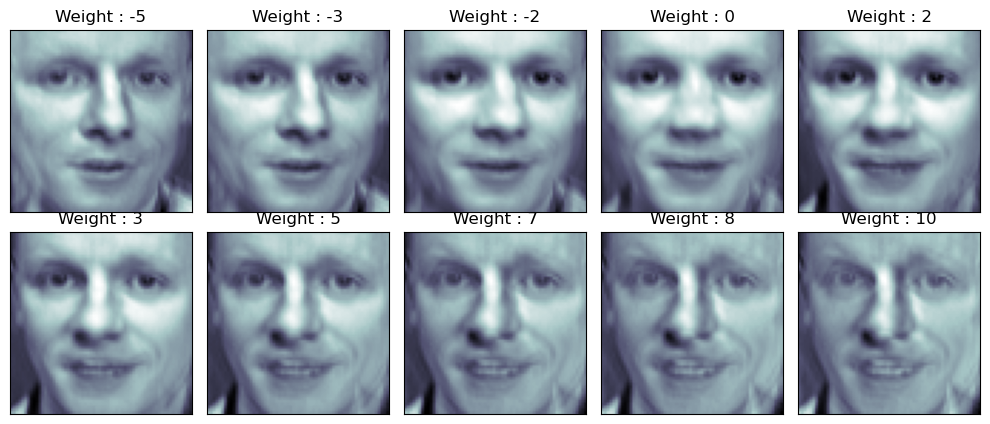

In [39]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N * M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p1, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('Weight : ' + str(round(w[n])))

plt.tight_layout()
plt.show()

### 두번째(face_2p) 성분의 변화

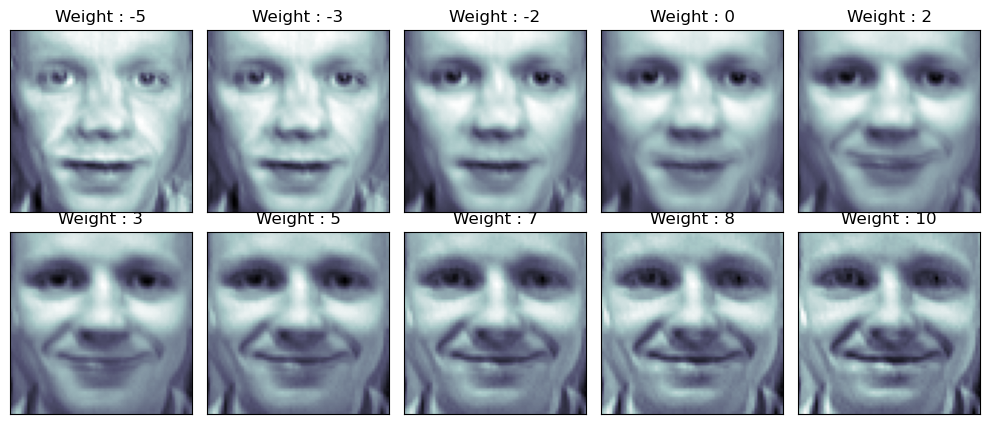

In [40]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N * M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p2, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('Weight : ' + str(round(w[n])))

plt.tight_layout()
plt.show()

### 2개의 성분 모두 표현

In [41]:
nx, ny = (5, 5)
x = np.linspace(-5, 8, nx)
y = np.linspace(-5, 8, ny)
w1, w2 = np.meshgrid(x, y)
w1, w2

(array([[-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ]]),
 array([[-5.  , -5.  , -5.  , -5.  , -5.  ],
        [-1.75, -1.75, -1.75, -1.75, -1.75],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ],
        [ 4.75,  4.75,  4.75,  4.75,  4.75],
        [ 8.  ,  8.  ,  8.  ,  8.  ,  8.  ]]))

In [42]:
w1.shape

(5, 5)

In [43]:
w1 = w1.reshape(-1,)
w2 = w2.reshape(-1,)
w1.shape

(25,)

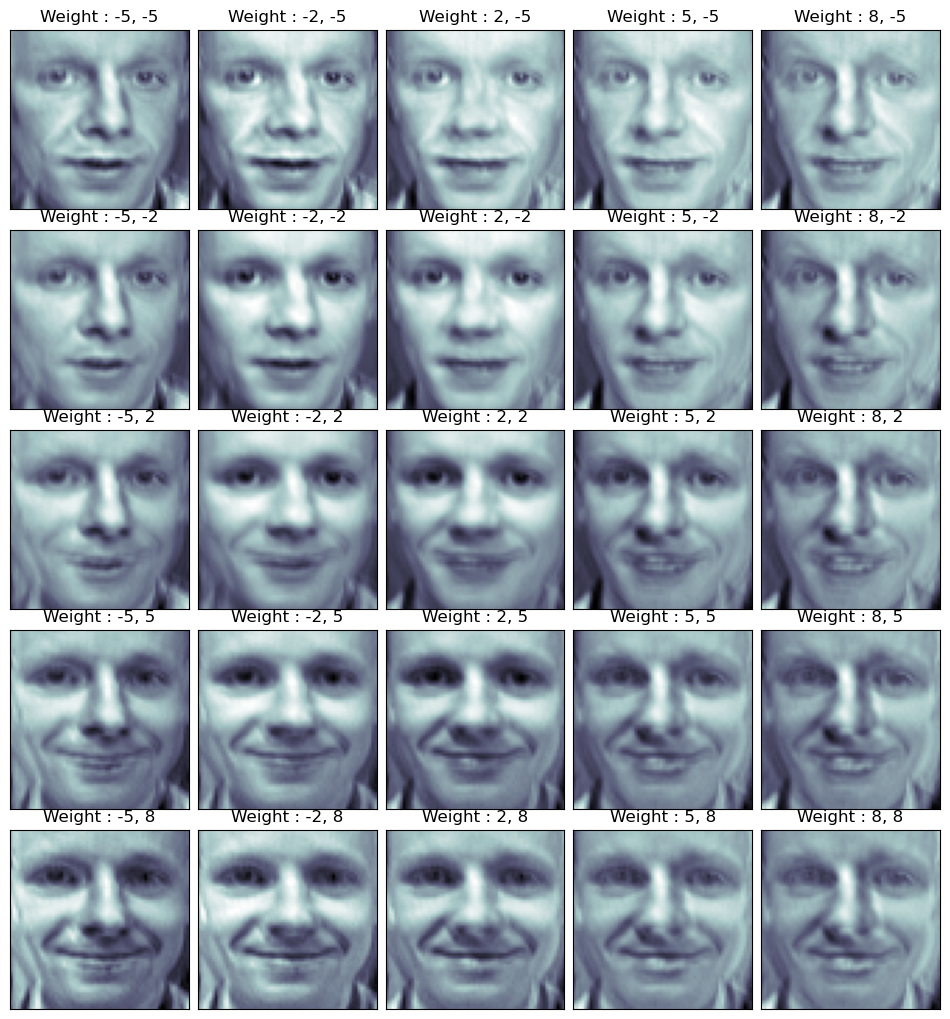

In [50]:
fig = plt.figure(figsize=(12, 10))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

N = 5
M = 5

for n in range(N * M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w1[n] * face_p1 + w2[n] * face_p2, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('Weight : ' + str(round(w1[n])) + ', ' + str(round(w2[n])))

plt.show()